In [1]:
import time
import mlrose_hiive as mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils import parallel_backend

random_state = 7
start = 10
stop = 101
step = 10
size = 20
problem_name = "EightQueens"
plt.style.use('ggplot')

### Eight Queen - Randomized Optimization

In [2]:
fitness = mlrose.Queens()

problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
# Random Hill Climbing

algo_stats = []
with parallel_backend('threading'):
    for max_attempts in range(start, stop, step):
        print("Random Hill Climbing")
        print("\t Attempt: {}\n".format(max_attempts))
        start_time = time.time()*100
        best_state, best_fitness, curve_vals = mlrose.random_hill_climb(problem, 
                                                                        max_attempts=max_attempts, 
                                                                        curve=True, 
                                                                        random_state=random_state)
        stop_time = time.time()*100
        runtime = stop_time - start_time
        algo_stats.append([problem_name, "RandomHillClimb", best_state, best_fitness, max_attempts, curve_vals.size, curve_vals, runtime])  

    # Genetic Algorithm
    for max_attempts in range(start, stop, step):
        print("Genetic Algorithm")
        print("\t Attempt: {}\n".format(max_attempts))
        start_time = time.time()*100
        best_state, best_fitness, curve_vals = mlrose.genetic_alg(problem, 
                                                                  max_attempts=max_attempts, 
                                                                  curve=True, 
                                                                  random_state=random_state)
        stop_time = time.time()*100
        runtime = stop_time - start_time
        algo_stats.append([problem_name, "GeneticAlgorithm", best_state, best_fitness, max_attempts, curve_vals.size, curve_vals, runtime]) 
    
    schedule = mlrose.ExpDecay()
    # Simulated Annealing
    for max_attempts in range(start, stop, step):
        print("Simulated Annealing")
        print("\t Attempt: {}\n".format(max_attempts))
        start_time = time.time()*100
        best_state, best_fitness, curve_vals = mlrose.simulated_annealing(problem, 
                                                                          max_attempts=max_attempts, 
                                                                          curve=True, 
                                                                          random_state=random_state,
                                                                          schedule=schedule)
        stop_time = time.time()*100
        runtime = stop_time - start_time
        algo_stats.append([problem_name, "SimulatedAnnealing", best_state, best_fitness, max_attempts, curve_vals.size, curve_vals, runtime]) 
    
    # MIMIC
    for max_attempts in range(start, stop, step):
        print("MIMIC")
        print("\t Attempt: {}\n".format(max_attempts))
        start_time = time.time()*100
        best_state, best_fitness, curve_vals = mlrose.mimic(problem, 
                                                            max_attempts=max_attempts, 
                                                            curve=True, 
                                                            random_state=random_state)
        stop_time = time.time()*100
        runtime = stop_time - start_time
        algo_stats.append([problem_name, "MIMIC", best_state, best_fitness, max_attempts, curve_vals.size, curve_vals, runtime])

dfstats = pd.DataFrame(algo_stats, columns=['Problem', 'Algorithm', 'Best_State', 'Best_Fitness', 'Max_Attempts', 'Iterations', 'Fitness', 'Runtime'])

dfstats.sort_values(['Best_Fitness', 'Iterations'], ascending=[False, True]).iloc[0]


Random Hill Climbing
	 Attempt: 10

Random Hill Climbing
	 Attempt: 20

Random Hill Climbing
	 Attempt: 30

Random Hill Climbing
	 Attempt: 40

Random Hill Climbing
	 Attempt: 50

Random Hill Climbing
	 Attempt: 60

Random Hill Climbing
	 Attempt: 70

Random Hill Climbing
	 Attempt: 80

Random Hill Climbing
	 Attempt: 90

Random Hill Climbing
	 Attempt: 100

Genetic Algorithm
	 Attempt: 10

Genetic Algorithm
	 Attempt: 20

Genetic Algorithm
	 Attempt: 30

Genetic Algorithm
	 Attempt: 40

Genetic Algorithm
	 Attempt: 50

Genetic Algorithm
	 Attempt: 60

Genetic Algorithm
	 Attempt: 70

Genetic Algorithm
	 Attempt: 80

Genetic Algorithm
	 Attempt: 90

Genetic Algorithm
	 Attempt: 100

Simulated Annealing
	 Attempt: 10

Simulated Annealing
	 Attempt: 20

Simulated Annealing
	 Attempt: 30

Simulated Annealing
	 Attempt: 40

Simulated Annealing
	 Attempt: 50

Simulated Annealing
	 Attempt: 60

Simulated Annealing
	 Attempt: 70

Simulated Annealing
	 Attempt: 80

Simulated Annealing
	 Attemp

Problem                                               EightQueens
Algorithm                                                   MIMIC
Best_State      [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...
Best_Fitness                                                   37
Max_Attempts                                                   10
Iterations                                                     13
Fitness         [35.0, 36.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37....
Runtime                                                   359.097
Name: 30, dtype: object

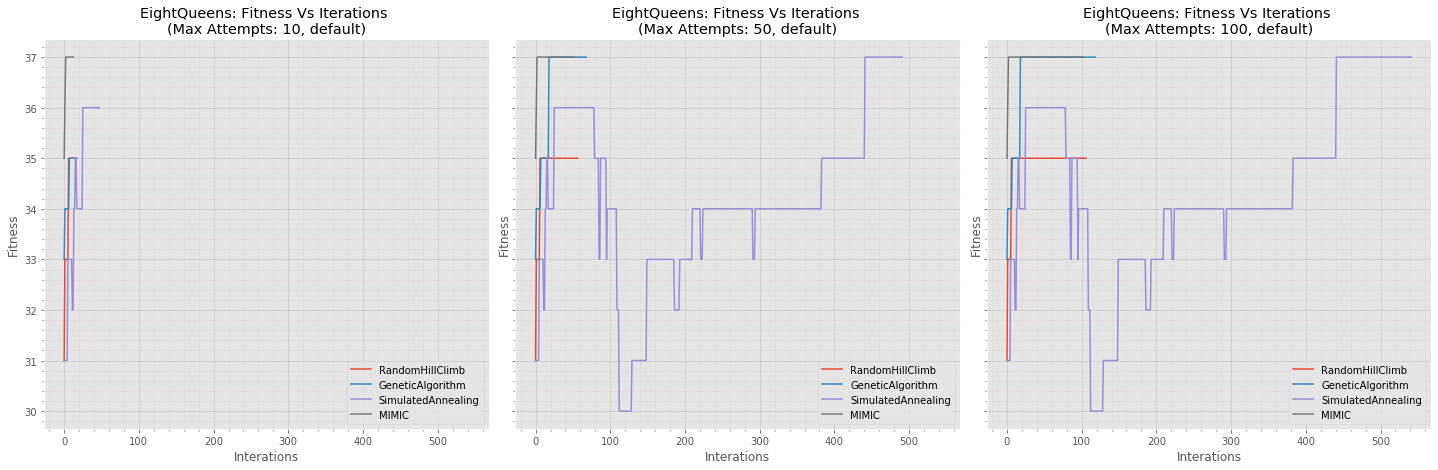

In [3]:
plt.close('all')
fig, axs = plt.subplots(1, 3, figsize=(20, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.tight_layout()
for ax, max_attempts in zip(axs.ravel(), [10, 50, 100]):
    for i in range(0, dfstats[dfstats['Max_Attempts']==max_attempts].shape[0]):
        ax.plot(dfstats[dfstats['Max_Attempts']==max_attempts].iloc[i]['Fitness'], 
                label=dfstats[dfstats['Max_Attempts']==max_attempts].iloc[i]['Algorithm'])
        ax.set_title('{}: Fitness Vs Iterations \n(Max Attempts: {}, default)'.format(problem_name, max_attempts))
        ax.legend(loc='lower right')
        ax.set_xlabel('Interations')
        ax.set_ylabel('Fitness')
        ax.minorticks_on()
        ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
        ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
    

plt.savefig("{}_Fitness_Defaults.png".format(problem_name), bbox_inches='tight')  

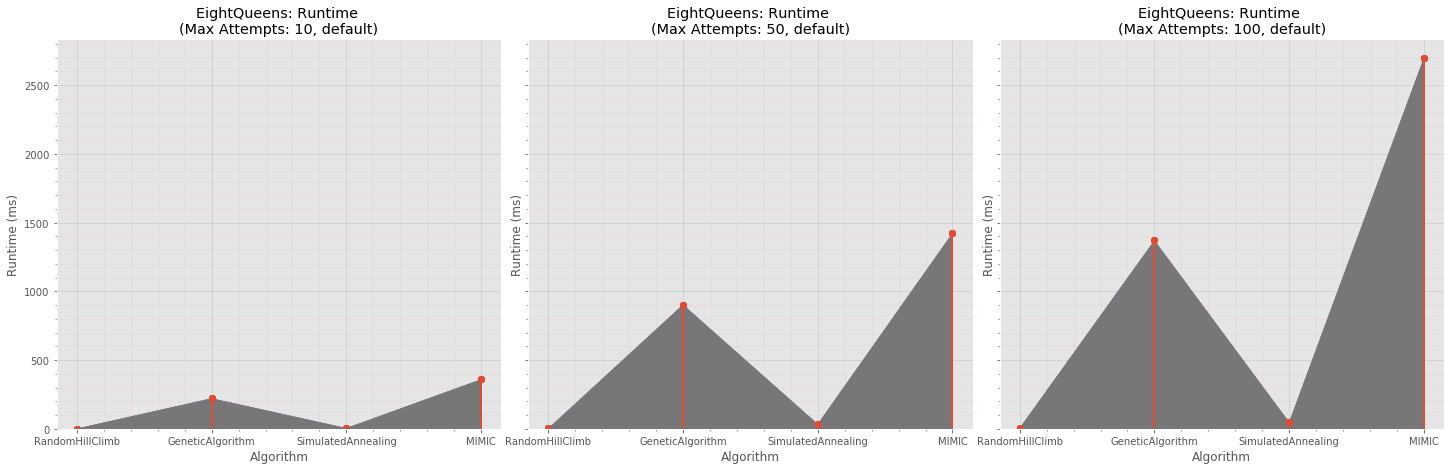

In [4]:
plt.close('all')
fig, axs = plt.subplots(1, 3, figsize=(20, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.tight_layout()
for ax, max_attempts in zip(axs.ravel(), [10, 50, 100]):
    for i in range(0, dfstats[dfstats['Max_Attempts']==max_attempts].shape[0]):
        ax.stem(dfstats[dfstats['Max_Attempts']==max_attempts]['Algorithm'], dfstats[dfstats['Max_Attempts']==max_attempts]['Runtime'])
        ax.stackplot(dfstats[dfstats['Max_Attempts']==max_attempts]['Algorithm'], dfstats[dfstats['Max_Attempts']==max_attempts]['Runtime'], labels=dfstats[dfstats['Max_Attempts']==max_attempts]['Algorithm'])
        ax.set_title('{}: Runtime \n(Max Attempts: {}, default)'.format(problem_name, max_attempts))
        ax.set_xlabel('Algorithm')
        ax.set_ylabel('Runtime (ms)')
        ax.minorticks_on()
        ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
        ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)

plt.savefig("{}_Runtime_Defaults.png".format(problem_name), bbox_inches='tight') 